In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [48]:
## Read the dataset
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

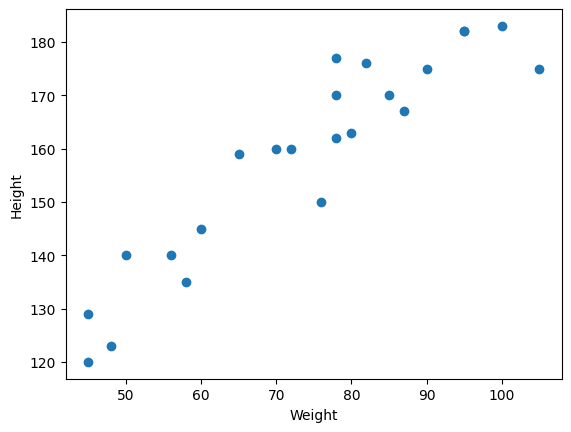

In [49]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [50]:
## divide our dataset into independent and dependent edatures
X=df[['Weight']] ##independent feature
y=df['Height'] ##dependent feature

In [51]:
## Train test split
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [53]:
## standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [54]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

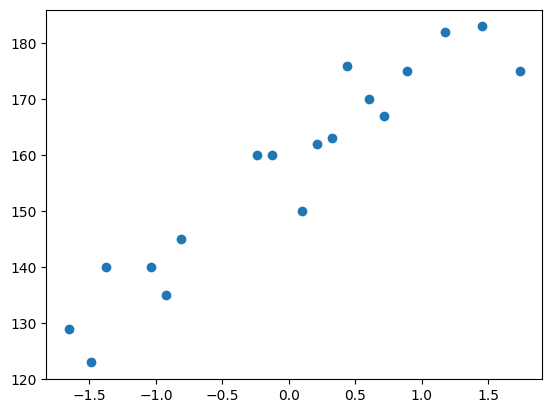

In [55]:
plt.scatter(X_train,y_train)

In [56]:
## Train the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient of weight is  [17.03440872]
Intercept: 157.5


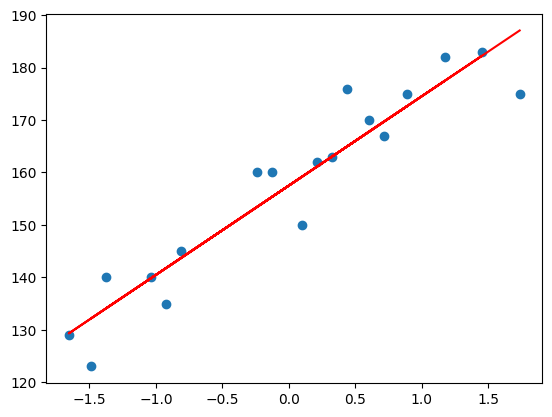

In [57]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

In [58]:
y_pred_test = regressor.predict(X_test)
print('Actual:', y_test.values)
print('Predicted:', y_pred_test)

Actual: [177 170 120 182 159]
Predicted: [161.08467086 161.08467086 129.3041561  177.45645118 148.56507414]


Plotting the test data points and the predicted best fit line helps visualize model accuracy.

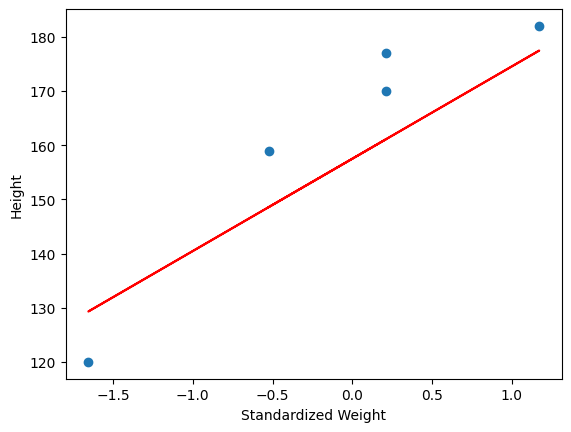

In [59]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_test, color='red')
plt.xlabel('Standardized Weight')
plt.ylabel('Height')
plt.show()

We evaluate the model using Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R squared (
R
2
R
2
 ) score.

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('R squared:', r2)


Mean Squared Error: 109.77592599051664
Mean Absolute Error: 9.822657814519232
Root Mean Squared Error: 10.477400726827081
R squared: 0.776986986042344


We calculate adjusted R squared using the R squared score, number of observations, and number of predictors.

In [61]:
n = len(y_test)
k = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print('Adjusted R squared:', adjusted_r2)

Adjusted R squared: 0.7026493147231252


Predicting Height for a New Weight Value

To predict height for a new weight, we first standardize the weight using the same scaler and then use the model to predict.

In [64]:
scaled_weight=scaler.transform([[80]])
scaled_weight
print("The height prediction for weight 80 kg is :",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is : [163.01076266]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


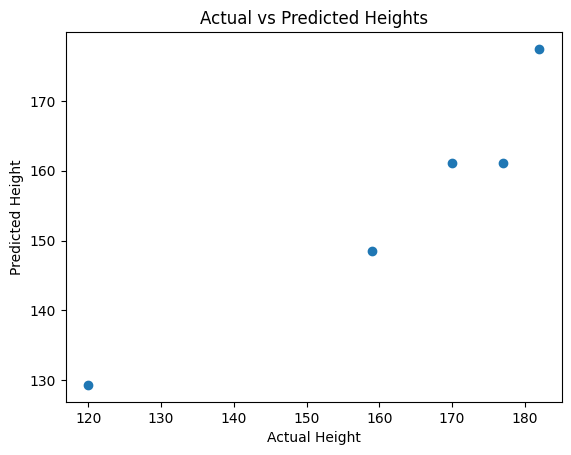

In [65]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Height')
plt.ylabel('Predicted Height')
plt.title('Actual vs Predicted Heights')
plt.show()

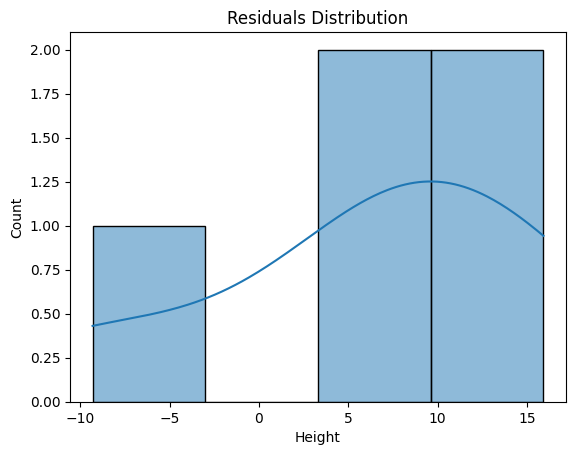

In [66]:
import seaborn as sns

residuals = y_test - y_pred_test
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

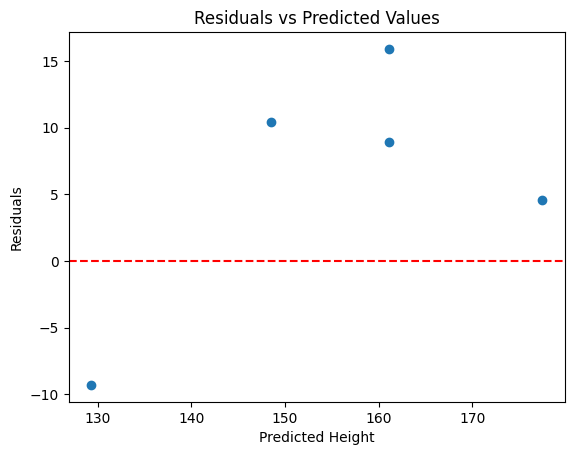

In [67]:
plt.scatter(y_pred_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Height')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()